<a href="https://colab.research.google.com/github/sanimesa/genai/blob/main/notebooks/openai_assistants_api_code_interpreter_too.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the openai package

In [ ]:
!pip install openai
%pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
!pip show openai

Name: openai
Version: 1.3.7
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: llmx


# Set up the api

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
from openai import OpenAI
client = OpenAI()

In [ ]:
dir(client.files)
files = client.files.list().data

for file in files:
    print(file.filename, file.id)

Milestones by Teacher 2023 - Brantley.xlsx - Sheet1.csv file-MW49SjKPMO50PAqwAph8BVZx
earthquakes-volcanoes-pacific-nw.pdf file-6jw4XdQTzCYwrOlWa7fO9lxw
2022-01929 National Standards for the Licensure.pdf file-EcY5KjEkWEOsWXW303wb8hCy
cars.xlsx file-74J5ncWosMYkmVduBdwmn6yB
oscar_age_female.csv file-xeceKITiCbWJd4oiMQR5MtiC
Iris.csv file-qPrhCVV5SSGE9fwXc833lXs7
Iris.csv file-HFHWfJVFRHXmpKXAbUEGPq1e
Iris.csv file-aspXOrYNeC28m8VrMvWxzv2D


# Upload a file

In [ ]:
def file_upload(path):

    file = client.files.create(
        file=open(path, "rb"),
        purpose='assistants'
    )

    print(f'{file.id}')

    return file.id

# Use the Code Interpreter to generate charts

In [ ]:
import time

def code_interpreter(file_id, query):

    #set up the Assistant with the code_interpreter tool
    assistant = client.beta.assistants.create(
        name="Data visualizer",
        description="You are great at creating beautiful data visualizations. You analyze data present in .csv files, understand trends, and come up with data visualizations relevant to those trends. You also share a brief text summary of the trends observed.",
        model="gpt-4-1106-preview",
        tools=[{"type": "code_interpreter"}],
        file_ids=[file_id]
    )

    print(f'{assistant.id=}')
    print(f'{query=}')
    print(f'{type(query)=}')

    #create a thread
    thread = client.beta.threads.create(
        messages=[
            {
            "role": "user",
            # "content": "Can you do a cluster analysis on sepal width and length and plot the clusters? Use 3 clusters. Also, please provide me the python code to download the generated image fie and save it on my machine.",
            "content": query,
            "file_ids": [file_id]
            }
        ]
    )

    print(f'{thread.id=}')

    #create a run object
    run = client.beta.threads.runs.create(
        thread_id=thread.id,
        assistant_id=assistant.id,
        instructions="Please address the user as Manager. The user has a premium account."
    )

    print(f'{run.id=}')

    time.sleep(10)

    #poll the thread until complete
    run = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

    while True:
        print(f'{run.id=} {run.status=}')

        run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id
        )

        status = run.status

        if status == 'in_progress':
            time.sleep(10)
        else:
            break

    messages = client.beta.threads.messages.list(
        thread_id=thread.id
    )

#     print(messages)

    return messages

In [ ]:
file_id = 'file-qPrhCVV5SSGE9fwXc833lXs7' #this was uploaded before, check the first part of the notebook to see how to list files
query = "Can you do a cluster analysis on sepal width and length and plot the clusters? Use 3 clusters. Also, please provide me the python code to download the generated image fie and save it on my machine."

messages = code_interpreter(file_id, query)
print(messages)

assistant.id='asst_WEcoc5jSA9zXskexYO9OLcfK'
query='Can you do a cluster analysis on sepal width and length and plot the clusters? Use 3 clusters. Also, please provide me the python code to download the generated image fie and save it on my machine.'
type(query)=<class 'str'>
thread.id='thread_7DN1i5KotQzdS3buhtVHZvUI'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run_Ltl9yBbll8JrUAdP08UqsyBi' run.status='in_progress'
run.id='run

# Retrieve and display chart

In [ ]:
from PIL import Image
import io

def retrieve_file(file_id):

    api_response = client.files.with_raw_response.retrieve_content(file_id)

    if api_response.status_code == 200:

        content = api_response.content
        with open('imageoutput.png', 'wb') as f:
            f.write(content)
        print('File downloaded successfully.')

    image = Image.open(io.BytesIO(content))
#     image.show()
    return image

File downloaded successfully.


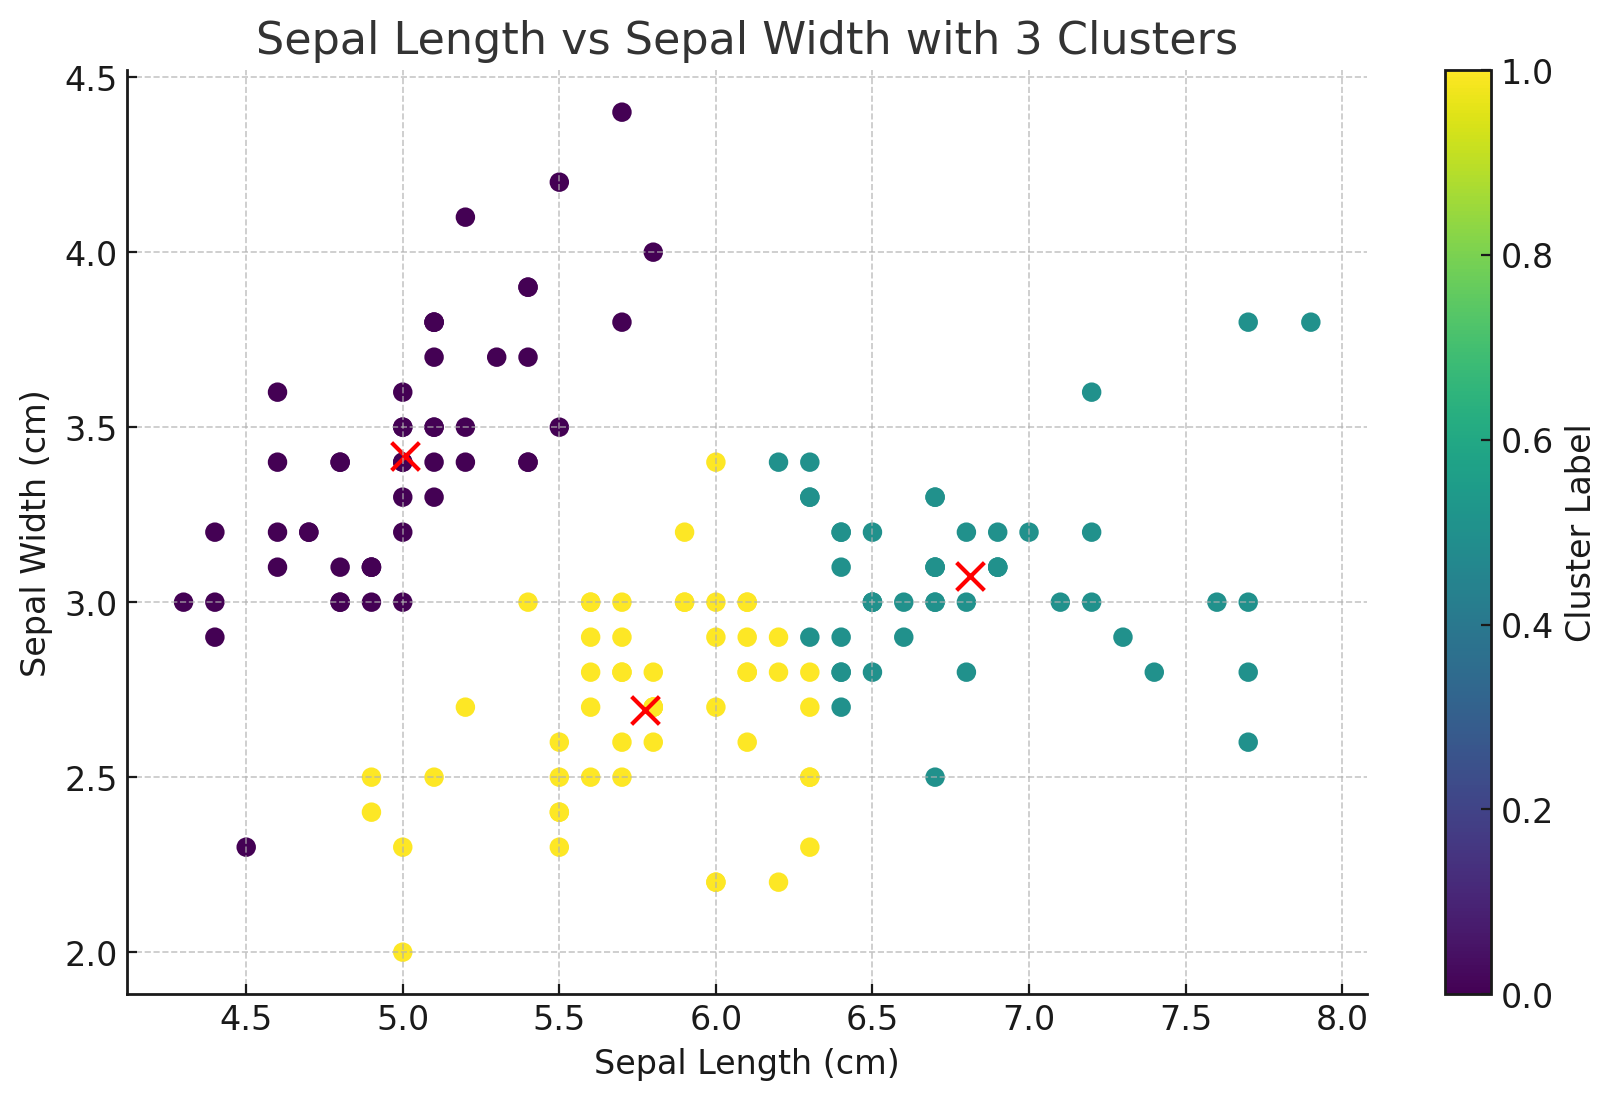

In [ ]:
retrieve_file(messages.data[0].content[0].image_file.file_id)

assistant.id='asst_JK1ltZ4hfOJoQq37ulDT0gYF'
query='Can you do a stacked bar chart of average sepal length and width by species?'
type(query)=<class 'str'>
thread.id='thread_c9jCn4rLiksxYSunoFMCo92L'
run.id='run_SxHuWuXKlPraTnhZ9IaOMMvw'
run.id='run_SxHuWuXKlPraTnhZ9IaOMMvw' run.status='in_progress'
run.id='run_SxHuWuXKlPraTnhZ9IaOMMvw' run.status='in_progress'
run.id='run_SxHuWuXKlPraTnhZ9IaOMMvw' run.status='in_progress'
run.id='run_SxHuWuXKlPraTnhZ9IaOMMvw' run.status='in_progress'
run.id='run_SxHuWuXKlPraTnhZ9IaOMMvw' run.status='in_progress'
SyncCursorPage[ThreadMessage](data=[ThreadMessage(id='msg_jaNVhFSsziE3Xr8jcE9mhoYn', assistant_id='asst_JK1ltZ4hfOJoQq37ulDT0gYF', content=[MessageContentImageFile(image_file=ImageFile(file_id='file-DAlkRw75sQTKdNQfctGm8u7y'), type='image_file'), MessageContentText(text=Text(annotations=[], value="Here is the stacked bar chart showing the average sepal length and width by species. The green bars represent the average sepal length, while the bl

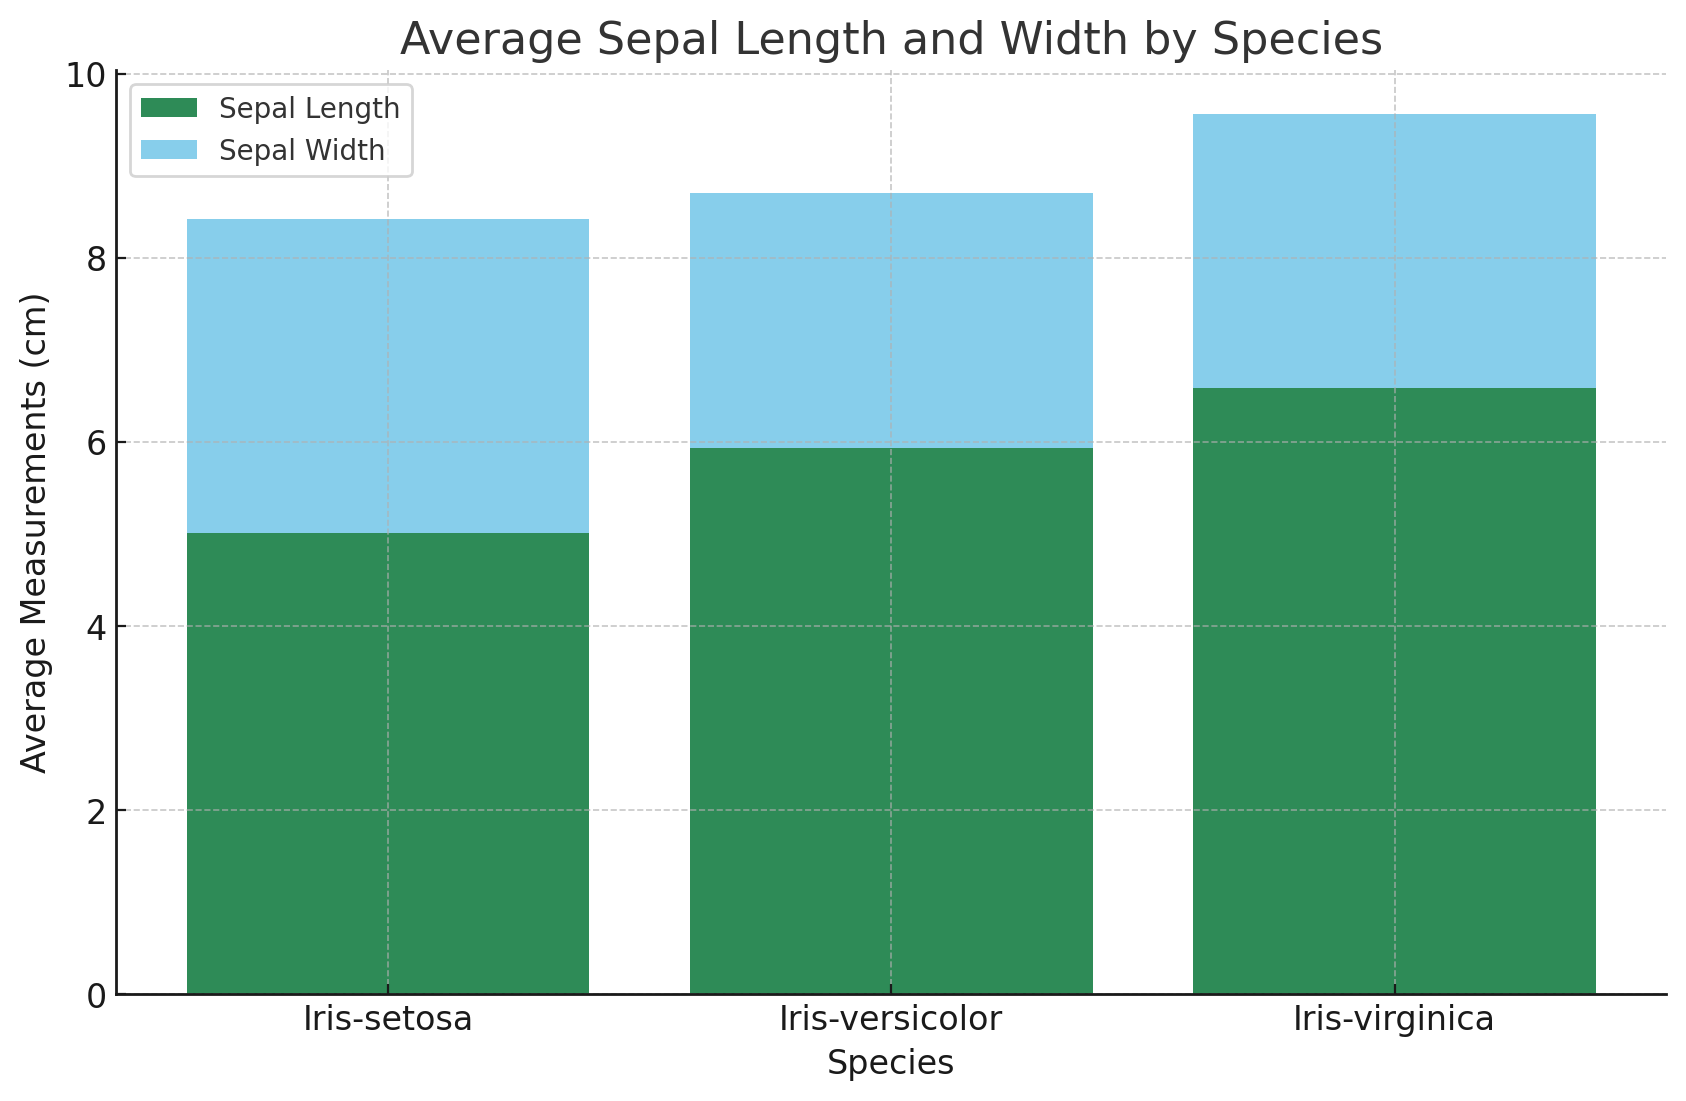

In [ ]:
file_id = 'file-qPrhCVV5SSGE9fwXc833lXs7'
query = "Can you do a stacked bar chart of average sepal length and width by species?"

messages = code_interpreter(file_id, query)
print(messages)
retrieve_file(messages.data[0].content[0].image_file.file_id)